## ESTATÍSTICA DESCRITIVA

                                                                            Bruno Bastos
                                                                            Matheus Olimpio


### 1.0 introdução
Com o expansionismo das cidades, surge a necessidade de definir novos departamentos de polícia. As informações das ocorrências de cada departamento, permitem uma análise discretiva
da cidade.
Este projeto tem como objetivo a realização de uma análise descritiva no município de Guaratinguetá, pertencente ao estado de São Paulo, Brasil.
    
    
### 2.0 Variáveis
A primeira fase deste projeto é definir as variáveis do estudo. A cidade de Guaratinguetá possui três departamentos policiais, as ocorrências são separadas por categorias de crimes, e todas as ocorrências possuem uma data de registro. A partir desta informação, já é possível definir quatro variáveis de estudo, sendo elas, crimes, meses, anos e departamentos.
##### 2.1 Classificação de Variáveis
Todas as variáveis neste projeto são qualitativas. Podemos definir crimes e departamentos como  qualitativa nominal, e meses e anos como qualitativo ordinal.

##### 2.2 Amostras
A amostra de dados que será coletada, são pertencente ao ano de 2017, 2018 e 2019, sendo o último, um conjunto de amostra de apenas dois meses, Janeiro e Fevereiro. 

Os dados das analises realizada neste trabalho, estão presente no diretório **./data/**, todos com a extensão .csv, conforme fornecidos no site da SSP, http://www.ssp.sp.gov.br/Estatistica/Pesquisa.aspx.


### 3.0 Metodologia
##### 3.1  Leitor de Arquivo
Os arquivos fornecidos pela SSP, conforme descrito acima são de extensão .csv. Portanto, foi necessário a criação de uma classe que tivesse a resposabilidade de criar uma interface com os arquivos CSV, a fim de que esses dados pudessem ser coletados e transformados em um formato de fácil manipulação para análise.

##### 3.2 Legendas de Ocorrencias
As ocorrências fornecidas pela SSP, possuem um nome consideravelmente extenso, dificultando a organização e visualização dos dados. Para amenizar essas dificuldades criaremos legendas com siglas para identificar uma ocorrencia.



In [10]:
CsvI.tableDescrib()

+-------------------------------------------+-------+
|                   Título                  | Sigla |
+-------------------------------------------+-------+
|   OCORRÊNCIAS DE PORTE DE ENTORPECENTES   |  OPE  |
|  OCORRÊNCIAS DE TRÁFICO DE ENTORPECENTES  |  OTE  |
| OCORRÊNCIAS DE APREENSÃO DE ENTORPECENTES |  OAE  |
|    OCORRÊNCIAS DE PORTE ILEGAL DE ARMA    |  OPIA |
|      Nº DE ARMAS DE FOGO APREENDIDAS      |  NAFA |
|         Nº DE FLAGRANTES LAVRADOS         |  NFL  |
| Nº DE INFRATORES APREENDIDOS EM FLAGRANTE |  NIAF |
|  Nº DE INFRATORES APREENDIDOS POR MANDADO |  NIAM |
|     Nº DE PESSOAS PRESAS EM FLAGRANTE     |  NPPF |
|      Nº DE PESSOAS PRESAS POR MANDADO     |  NPPM |
|          Nº DE PRISÕES EFETUADAS          |  NPE  |
|         Nº DE VEÍCULOS RECUPERADOS        |  NVR  |
|  TOT. DE INQUÉRITOS POLICIAIS INSTAURADOS |  TIPI |
+-------------------------------------------+-------+


##### 3.2 Manipulação dos dados
Com os dados coletados pela classe CsvI(Csv Implementation), é necessário transformar esses dados em informação. Neste projeto, há uma classe chamada MathI(Math Implementation), responsável por realizar diversas técnicas utilizada na estatistica discritiva.

### 4.0 Análise Discritiva
 Nas sessões a seguir, são realizada as análises com as variaveis definidas na Sessão 2.1.
 Toda a análise dos gráficos começará com a explicação, seguida do conjunto de gráficos que representam a análise.

###### 4.1 Distribuição de frequencia dos departamentos
O primeiro fator a ser avalido nesse trabalho, é a dimensão porcentual das ocorrencias registradas em cada departamento, dentro do ano de 2017, 2018 e 2019(apenas Janeiro e Fevereiro).

Com os gráficos dos três anos, em uma análise geral, é notável que o Dep 01 é o departamento que mais registra ocorrencias em todo o ano. 


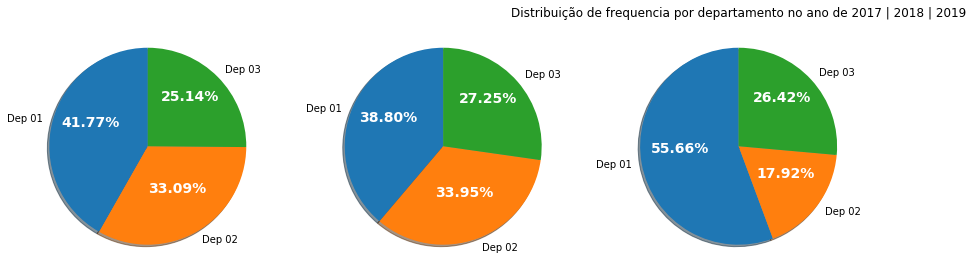

Quantidade de ocorrencias
+------+------+------+
| 2017 | 2018 | 2019 |
+------+------+------+
| 541  | 433  | 106  |
+------+------+------+
Total: 1080


In [80]:
s1, s2 = MathI.pizzaYear([DP01, DP02, DP03], '2017')
s3, s4 = MathI.pizzaYear([DP01, DP02, DP03], '2018')
s5, s6 = MathI.pizzaYear([DP01, DP02, DP03], '2019')
MathI.drawPizzaYear([[s1,s2],[s3,s4],[s5,s6]])
CsvI.table([[s1, s3, s5]], ['2017','2018','2019'], None, title= 'Quantidade de ocorrencias')
CsvI.msg('Total:',(s1 + s3 + s5))


A análise acima é real, mas desproporcional, em vista de que nos anos de 2017 e 2018, foi realizada a somatória dos 12 meses, enquanto no ano de 2019 foram considerados apenas os dois primeiros meses.

Para que possamos realizar uma análise justa com os três anos(2017, 2018 e 2019), vamos realizar a somatória das ocorrencias para cada departamento apenas nos meses de Janeiro e Fevereiro dos três anos consecutivos.


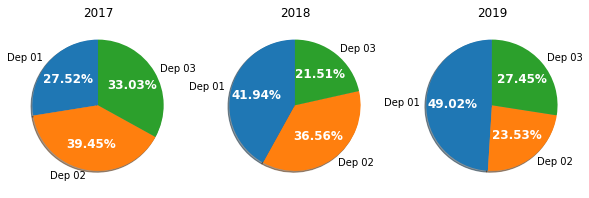

Quantidade de ocorrencias em Jan e Fev
+--------------+------+------+------+
| departamento | 2017 | 2018 | 2019 |
+--------------+------+------+------+
|     DP01     |  30  |  39  |  50  |
|     DP02     |  43  |  34  |  24  |
|     DP03     |  36  |  20  |  28  |
+--------------+------+------+------+


In [68]:
data = MathI.pizzaMonth([DP01, DP02, DP03], [1,2], ['2017','2018','2019'])
MathI.drawPizzaMonth(data,['DP01','DP02','DP03'],['2017','2018','2019'])
CsvI.table(data,['departamento','2017','2018','2019'],['DP01','DP02','DP03'],title='Quantidade de ocorrencias em Jan e Fev')

###### 4.1 Distribuição de frequencia por natureza
A categorização de uma ocorrencia é chamada de natureza,logo, no inicio de nosso trabalho, foi definido uma tabela com as naturezas e siglas para que melhor possamos desenvolver os gráficos e tabelas. 

In [78]:
import csv
from prettytable import PrettyTable

# CSV Implementation 
class CsvI:
    
    @staticmethod
    def read(file):
        matrix = []
        
        with open(file, encoding="utf8") as csvFile:
            reader = csv.reader(csvFile)
            for row in reader:
                matrix.append(row)
            csvFile.close()
        
        return matrix
    
    @staticmethod 
    def msg(title, msg):
        print("{0} {1}". format(title, msg))
    @staticmethod
    def table(datas, titles, params = None, title = None):
        x = PrettyTable()
        x.field_names= titles
        if datas is not None:
            if title is not None:
                print(title)
            if params is not None:
                for i in range(len(datas)):
                    array = []
                    array.append(params[i])
                    for j in range(len(datas[i])):
                        array.append(datas[i][j])
                    x.add_row(array)
            else:
                for i in range(len(datas)):
                    array = []
                    for j in range(len(datas[i])):
                        array.append(datas[i][j])
                    x.add_row(datas[i])
        
        print(x)
    
    @staticmethod
    def tableDescrib():
        x = PrettyTable()
        colunas = ['Título','Sigla']
        x.field_names = colunas

        x.add_row(['OCORRÊNCIAS DE PORTE DE ENTORPECENTES','OPE']);
        x.add_row(['OCORRÊNCIAS DE TRÁFICO DE ENTORPECENTES','OTE']);
        x.add_row(['OCORRÊNCIAS DE APREENSÃO DE ENTORPECENTES','OAE']);
        x.add_row(['OCORRÊNCIAS DE PORTE ILEGAL DE ARMA','OPIA']);
        x.add_row(['Nº DE ARMAS DE FOGO APREENDIDAS','NAFA']);
        x.add_row(['Nº DE FLAGRANTES LAVRADOS','NFL']);
        x.add_row(['Nº DE INFRATORES APREENDIDOS EM FLAGRANTE','NIAF']);
        x.add_row(['Nº DE INFRATORES APREENDIDOS POR MANDADO','NIAM']);
        x.add_row(['Nº DE PESSOAS PRESAS EM FLAGRANTE','NPPF']);
        x.add_row(['Nº DE PESSOAS PRESAS POR MANDADO','NPPM']);
        x.add_row(['Nº DE PRISÕES EFETUADAS','NPE']);
        x.add_row(['Nº DE VEÍCULOS RECUPERADOS','NVR']);
        x.add_row(['TOT. DE INQUÉRITOS POLICIAIS INSTAURADOS','TIPI']);

        print(x)

DP01 = {
    '2017': CsvI.read('./data/DP012017.csv'),
    '2018' : CsvI.read('./data/DP012018.csv'),
    '2019' : CsvI.read('./data/DP012019.csv')
}
DP02 = {
    '2017': CsvI.read('./data/DP022017.csv'),
    '2018' : CsvI.read('./data/DP022018.csv'),
    '2019' : CsvI.read('./data/DP022019.csv')
}
DP03= {
    '2017': CsvI.read('./data/DP032017.csv'),
    '2018' : CsvI.read('./data/DP032018.csv'),
    '2019' : CsvI.read('./data/DP032019.csv')
}
#table = CsvI.toTable(DP01,'2019')

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas


#Math Implementation
class MathI:
    
    #Mounthly Average
    @staticmethod
    def monAvg(data):
        pass
    # total Average /with all years for all departaments/
    @staticmethod
    def totalAvg(data):
        pass
        
    @staticmethod
    def pizzaYear(array, year):
        res = []
        for aux in range(len(array)):
            res.append(aux)
            res[aux] = 0
            for line in range(1,10):
                res[aux] += int(array[aux][year][line][13])
        soma = 0
        size = []
        for aux in range(len(res)):
            soma += res[aux]
        
        for aux in range(len(res)):
            size.append((res[aux] * 100)/soma)
        return [soma, size]
    
    @staticmethod
    def pizzaMonth(array, months, years):
        res = []
        for aux in range(len(array)):
            res.append(aux)
            res[aux] = []
            for year in range(len(years)):
                soma = 0
                for line in range(1,11):
                    for m in range(1,len(months)+1):
                        soma += int(array[aux][years[year]][line][m]) 
                res[aux].append(soma)
        return res
        
    @staticmethod
    def drawPizzaMonth(datas, column, labels):
        x = []
        x.append((datas[0][0], datas[1][0], datas[2][0]))
        x.append((datas[0][1], datas[1][1], datas[2][1]))
        x.append((datas[0][2], datas[1][2], datas[2][2]))
        fig, axs = plt.subplots(1,len(x), figsize=(10,10), sharex='col', sharey='row')
        for i in range(len(x)):
            wedges, texts, autotexts = axs[i].pie(x[i], labels=['Dep 01','Dep 02', 'Dep 03'],startangle=90, autopct='%1.2f%%', shadow=True)
            axs[i].set_title(labels[i])
            plt.setp(autotexts, size=12, weight="bold", color='w')
        #fig.suptitle("Title for whole figure")
        #fig.suptitle('Distribuição de frequencia por departamento em Janeiro e Fevereiro',pad=53.0,loc='right',fontsize=5)
        plt.show()

    @staticmethod
    def drawPizzaYear(array):   
        fig, axs = plt.subplots(1,len(array),figsize=(15,15))
        for x in range(len(array)):
            wedges, texts, autotexts = axs[x].pie(array[x][1], labels=['Dep 01','Dep 02', 'Dep 03'],startangle=90, autopct='%1.2f%%\n', shadow=True)
            plt.setp(autotexts, size=14, weight="bold", color='w')
        plt.title('Distribuição de frequencia por departamento no ano de {0}'. format('2017 | 2018 | 2019'))
        plt.show()

[[30, 39, 39], [43, 34, 24], [36, 20, 28]]


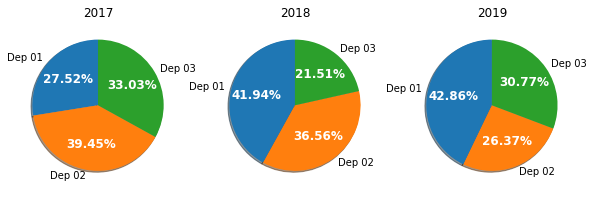

In [9]:
data = MathI.pizzaMonth([DP01, DP02, DP03], [1,2], ['2017','2018','2019'])
print(data)
MathI.drawPizzaMonth(data,['DP01','DP02','DP03'],['2017','2018','2019'])